In [1]:
import pandas as pd


df = pd.read_csv("Nat_Gas.csv")

print(df.head())


print(df.columns)


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9
Index(['Dates', 'Prices'], dtype='object')


In [2]:
print(df.dtypes)  


Dates      object
Prices    float64
dtype: object


In [4]:
import pandas as pd

df = pd.read_csv("Nat_Gas.csv")  


print(df.columns)



Index(['Dates', 'Prices'], dtype='object')


In [5]:
df['Dates'] = pd.to_datetime(df['Dates'])
print(df.dtypes) 


Dates     datetime64[ns]
Prices           float64
dtype: object


C:\Users\Admin\AppData\Local\Temp\ipykernel_16156\2771285464.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [6]:

print(df.isnull().sum())


Dates     0
Prices    0
dtype: int64


In [8]:
df = df.sort_values(by='Dates')


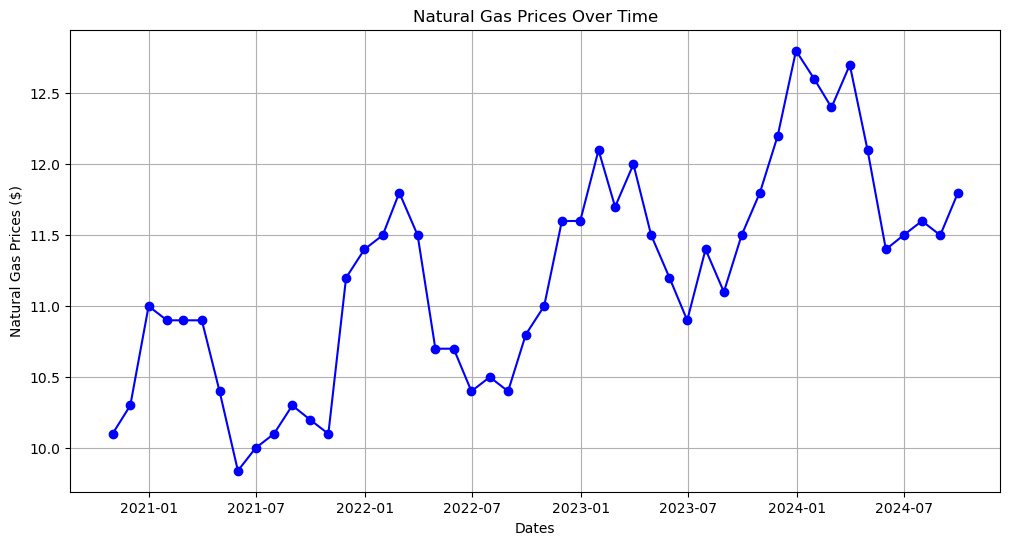

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-', color='b')
plt.xlabel("Dates")
plt.ylabel("Natural Gas Prices ($)")
plt.title("Natural Gas Prices Over Time")
plt.grid()
plt.show()


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

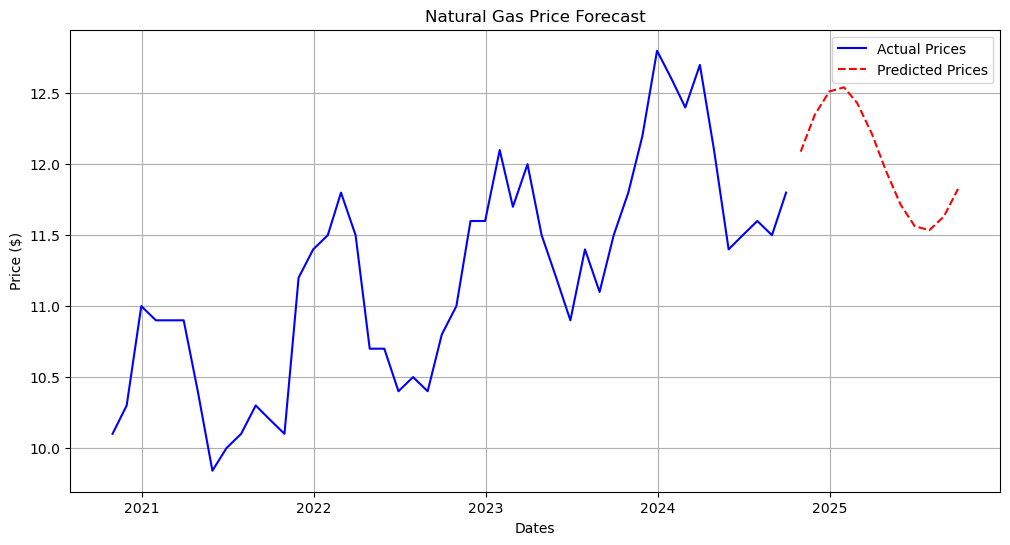

In [12]:
from statsmodels.tsa.arima.model import ARIMA

df.set_index('Dates', inplace=True)


model = ARIMA(df['Prices'], order=(2,1,2))  
model_fit = model.fit()


future_steps = 12
forecast = model_fit.forecast(steps=future_steps)

future_dates = pd.date_range(start=df.index[-1], periods=future_steps+1, freq='M')[1:]

future_df = pd.DataFrame({'Dates': future_dates, 'Predicted_Price': forecast})


plt.figure(figsize=(12,6))
plt.plot(df.index, df['Prices'], label="Actual Prices", color='blue')
plt.plot(future_df['Dates'], future_df['Predicted_Price'], label="Predicted Prices", linestyle="dashed", color='red')
plt.xlabel("Dates")
plt.ylabel("Price ($)")
plt.title("Natural Gas Price Forecast")
plt.legend()
plt.grid()
plt.show()


In [13]:
from datetime import datetime
import numpy as np

def predict_price(input_date):
    input_date = pd.to_datetime(input_date)  
    

    if input_date in df.index:
        return df.loc[input_date, 'Prices']
    
   
    elif input_date > df.index[-1]:
        months_ahead = (input_date.year - df.index[-1].year) * 12 + (input_date.month - df.index[-1].month)
        if months_ahead <= future_steps:
            return future_df.loc[future_df['Dates'] == input_date, 'Predicted_Price'].values[0]
        else:
            return "Prediction unavailable for dates beyond the forecasted period."
    
    else:
        return "Date is out of range."




In [14]:
print(predict_price("2025-06-30"))

11.563916494833682
